#### Computational Physics - Fall 2020
#### Shalma Wegsman

## Homework #2

### Problem 2
(C)

In [68]:
import numpy as np 

f_bits = np.arange(1,31)
e_bits = 31 - f_bits

e_max = 2**(e_bits) - 2 #based on computation done in pdf
e_min = 0
f_max_sum = (2**(f_bits)-1)/2**(f_bits)
f_min_sum = 2.**(-f_bits)

log_x_max = np.log10(1 + f_max_sum) + np.log10(2)
log_x_min = np.log10(f_min_sum) + (2)*np.log10(2)
log_sigma_x = -f_bits*np.log10(2)

print(log_sigma_x)

[-0.30103    -0.60205999 -0.90308999 -1.20411998 -1.50514998 -1.80617997
 -2.10720997 -2.40823997 -2.70926996 -3.01029996 -3.31132995 -3.61235995
 -3.91338994 -4.21441994 -4.51544993 -4.81647993 -5.11750993 -5.41853992
 -5.71956992 -6.02059991 -6.32162991 -6.6226599  -6.9236899  -7.2247199
 -7.52574989 -7.82677989 -8.12780988 -8.42883988 -8.72986987 -9.03089987]


Text(0.5, 1.0, 'Log_10 of x_max')

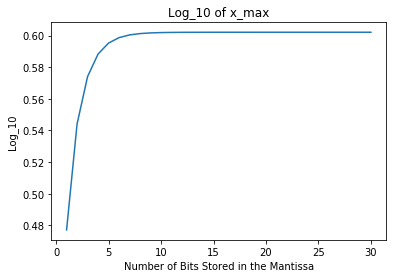

In [69]:
import pylab

pylab.plot(f_bits,log_x_max)

pylab.xlabel('Number of Bits Stored in the Mantissa')
pylab.ylabel('Log_10')
pylab.title('Log_10 of x_max')

Text(0.5, 1.0, 'Log_10 of x_min')

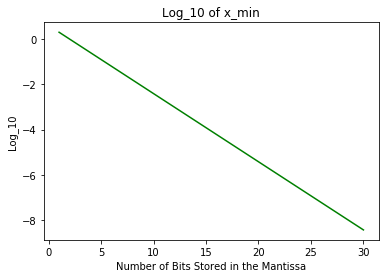

In [70]:
pylab.plot(f_bits,log_x_min,'g')

pylab.xlabel('Number of Bits Stored in the Mantissa')
pylab.ylabel('Log_10')
pylab.title('Log_10 of x_min')

Text(0.5, 1.0, 'Log_10 of sigma_x')

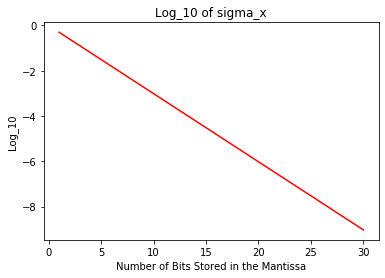

In [71]:
pylab.plot(f_bits,log_sigma_x,'r')
pylab.xlabel('Number of Bits Stored in the Mantissa')
pylab.ylabel('Log_10')
pylab.title('Log_10 of sigma_x')

(d)

If we care about increased precision, we want the highest number of bit stored in the mantissa possible, based on our graph above. Increasing this will also allow us to have a lower x_min, allowing us to do calculations on smaller numbers. Since x_max seems to level out at around 10 bits to the mantissa, I think taking 23 bits is very safe.

### Problem 3
Exercise 4.2 in Newman


(a)

In [1]:
import numpy as np

In [5]:
def Quadratic(a,b,c):
    x1 = (-b + np.sqrt(b**2 - (4*a*c))) / (2*a)
    x2 = (-b - np.sqrt(b**2 - (4*a*c))) / (2*a)
    return(x1,x2)

In [6]:
Quadratic(0.001,1000,0.001)

(-9.999894245993346e-07, -999999.999999)

(b) The fact we can also write our solutions as x = 2c / (-b -+ sqrt(b^2 - 4ac) is shown in the pdf part of the homework.

In [15]:
def QuadraticNew(a,b,c):
    x1 = (-b + np.sqrt(b**2 - (4*a*c))) / (2*a)
    x2 = (-b - np.sqrt(b**2 - (4*a*c))) / (2*a)
    x3 = (2*c) / (-b - np.sqrt(b**2 - (4*a*c)))
    x4 = (2*c) / (-b + np.sqrt(b**2 - (4*a*c)))
    return(x1,x2,x3,x4)

In [16]:
roots = QuadraticNew(0.001,1000,0.001)
print(roots)

(-9.999894245993346e-07, -999999.999999, -1.000000000001e-06, -1000010.5755125057)


Note that x1 and x2 are not exactly equal to x3 and x4. This is due to the rounding error in python from the limitation of only being able to store a finite number of digits for each value.

We can test which set of solutions is more accurate by plugging them back into the equation:

In [14]:
for i in range(4):
    x = roots[i]
    ans = 0.001*(x**2) + 1000*x + 0.001
    print("x",i+1," Error=",ans)

x 1  Error= 1.0575401665491313e-08
x 2  Error= 7.247924804689582e-08
x 3  Error= 0.0
x 4  Error= 10575.62534720993


So the second function found the first root most accurately, and the first function found the second root most accurately. 

(c)
To calculate both roots most accurately, we use the first algo for the second root and the second algo for the first root:

In [51]:
def BestQuadratic(a,b,c):
    roots = QuadraticNew(a,b,c)
    x1 = roots[2]
    x2 = roots[1]
    return(x1,x2)

In [52]:
newRoots = BestQuadratic(0.001,1000,0.001)
print(newRoots)

(-1.000000000001e-06, -999999.999999)


In [53]:
#Testing for accuracy of these roots:
for i in range(2):
    x = newRoots[i]
    ans = 0.001*(x**2) + 1000*x + 0.001
    print("x",i+1," Error=",ans)

x 1  Error= 0.0
x 2  Error= 7.247924804689582e-08


### Problem 4: Object-oriented programming 

In [77]:
import datetime # to get current year

class FreeTherapy(object): # object is the generic superclass
    """
    Attributes:
    -----------
    
    mood : int
        what is your mood today, from 0=sad to 10=happy?
    workday : bool
        did you do work today?
    friend : bool
        did you talk to a friend today?
    water : bool
        did you drink water today?
    outdoors : bool
        did you go outdoors today?
    stress : bool
        are you feeling stressed today?
    sleep : float
        how many hours of sleep did you get last night?
    
    
    Methods:
    --------
    
    checkin()
        responding to your mood
    advice()
        advice to feel better
    
    """
    
    def __init__(self, mood=None, workday=None, friend=None, water=None, outdoors=None, stress=None, sleep=None):
        self._initialize(mood=mood, workday=workday, friend=friend, water=water, outdoors=outdoors, stress=stress, sleep=sleep)
        return
    def _initialize(self, mood=None, workday=None, friend=None, water=None, outdoors=None, stress=None, sleep=None):
        self.mood=int(mood)
        self.workday=bool(workday)
        self.friend=bool(friend)
        self.water=bool(water)
        self.outdoors=bool(outdoors)
        self.stress=bool(stress)
        self.sleep=float(sleep)
        return
    
    def checkin(self):
        if self.mood > 6:
            print('I\'m glad you\'re feeling happy today!')
        elif self.mood < 5:
            print('What\'s getting you down today?')
        else:
            print('That\'s good to hear')
        return
    
    def advice(self):
        if self.workday == True:
            print('Good job getting work done today. Remember to give yourself a break when you need one!')
        if self.water == False:
            print('Make sure you drink some water today!')
        if self.friend == False:
            print('Maybe text/call a friend today and ask how they are doing.')
        if self.outdoors == False:
            print('Try getting yourself outside today for a short walk.')
        if self.stress == True:
            print('I\'m sorry you\'re feeling stressed. Try listening to some music or meditating.')
        if self.sleep < 6:
            print('Try to get more sleep tonight - you deserve it!')
        return

In [78]:
therapy = FreeTherapy(mood=7,workday=True,friend=True,water=True,outdoors=False,stress=True,sleep=7)
therapy.checkin()
therapy.advice()

I'm glad you're feeling happy today!
Good job getting work done today. Remember to give yourself a break when you need one!
Try getting yourself outside today for a short walk.
I'm sorry you're feeling stressed. Try listening to some music or meditating.


In [ ]:
#Give it a try!